<a href="https://colab.research.google.com/github/g6104018-lang/repository2/blob/main/convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CONVOLUCIONES ✔

# By Geraldine Barcenas Torralva & Andrea Muñoz López

# **¿Qué es una convolución?**
Es una operación que combina dos funciones para producir una tercera. Sirve para analizar cómo una señal o sistema modifica otra. En términos simples: La convolución mide cómo una función influye sobre otra a medida que se desplaza o "recorre". Fórmula general (continua)

# **¿Qué es una convolución matricial?**

Una convolución matricial es una operación que se hace entre dos matrices:

- Una matriz grande (por ejemplo, una imagen)
- Una matriz pequeña llamada kernel o filtro (como una mini-plantilla con números).

Es una operación fundamental para extraer características significativas de los datos de entrada, como imágenes, mediante la aplicación de filtros que detectan patrones locales en la información.

# **Redes convolucionales**

La imagen de entrada a la CNN (Convolutional Neural Network)
como una matriz NumPy de 3×3.
La CNN va a aplicar sobre ella un filtro para obtener características.

In [3]:
import numpy as np
from scipy.signal import convolve2d

# Matriz de imagen (entrada)
I = np.array([
    [1, 2, 0],
    [3, 1, 1],
    [0, 2, 2]
])

 K es el filtro que la CNN aplicará a la imagen para extraer características.


In [4]:
# Filtro (kernel)
K = np.array([
    [1, 0],
    [0, -1]
])

La salida es el mapa de características detectado por el filtro.

Los valores:

Positivos → el filtro detectó su patrón

Negativos → lo detectó pero en sentido contrario

Cero → no detectó nada importante
Este resultado se convierte en la entrada para la siguiente capa de la CNN.

In [5]:
# Convolución 2D
resultado = convolve2d(I, K, mode='valid')

print("Imagen (matriz de entrada):\n", I)
print("\nKernel (filtro):\n", K)
print("\nResultado de la convolución:\n", resultado)

Imagen (matriz de entrada):
 [[1 2 0]
 [3 1 1]
 [0 2 2]]

Kernel (filtro):
 [[ 1  0]
 [ 0 -1]]

Resultado de la convolución:
 [[ 0 -1]
 [-1  1]]


imports
NumPy sirve para:

Crear matrices (como la imagen I)

Crear filtros o kernels (K)

Hacer operaciones matemáticas internas

En CNN, las imágenes siempre se representan como matrices NumPy.
#Imagen original


*   Kernel
* Resultado de la convolución


In [6]:
# CONVOLUCIÓN 2D
# Visualización con matplotlib

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

la imagen que la CNN va a procesar.
* Es la entrada sobre la que el filtro va a moverse para detectar patrones.
* Sus valores representan el “contenido visual” que será transformado.

In [7]:
# MATRIZ DE IMAGEN (entrada)
I = np.array([
    [1, 2, 0],
    [3, 1, 1],
    [0, 2, 2]
])

aplica la operación esencial de una CNN: la convolución.
* Toma la imagen, aplica el filtro y genera una versión transformada.
* resultado es lo que la red usa para aprender patrones visuales.

In [8]:
# APLICAR CONVOLUCIÓN

resultado = convolve2d(I, K, mode='valid')

La imagen de entrada
* El filtro de convolución
* El resultado de la convolución

Todo junto, en una sola figura con 3 columnas.

Esto es típico en tareas de CNN, porque te permite ver:

Qué está detectando el filtro

Cómo se transforma la imagen

Cómo luce el mapa de características

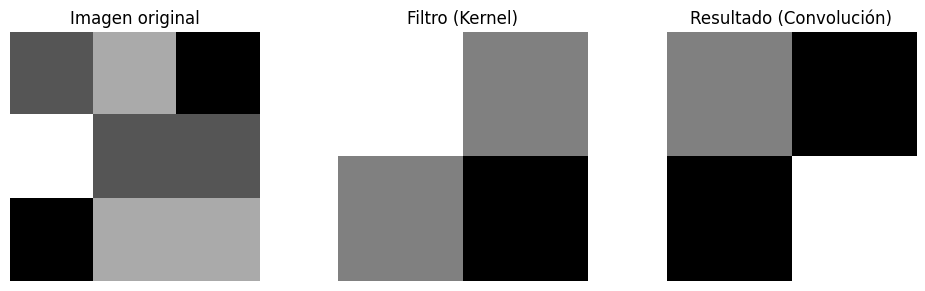

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Imagen original
axs[0].imshow(I, cmap='gray', interpolation='nearest')
axs[0].set_title("Imagen original")
axs[0].axis('off')

# Kernel (filtro)
axs[1].imshow(K, cmap='gray', interpolation='nearest')
axs[1].set_title("Filtro (Kernel)")
axs[1].axis('off')

# Resultado
axs[2].imshow(resultado, cmap='gray', interpolation='nearest')
axs[2].set_title("Resultado (Convolución)")
axs[2].axis('off')

plt.tight_layout()
plt.show()

Esta parte imprime todas las matrices para ver los números exactos.
* Es la comprobación numérica de la operación de convolución.
* Permite entender cómo trabaja una CNN desde adentro.

In [10]:
# IMPRIMIR VALORES NUMÉRICOS

print("Imagen (entrada):\n", I)
print("\nKernel (filtro):\n", K)
print("\nResultado de la convolución:\n", resultado)


Imagen (entrada):
 [[1 2 0]
 [3 1 1]
 [0 2 2]]

Kernel (filtro):
 [[ 1  0]
 [ 0 -1]]

Resultado de la convolución:
 [[ 0 -1]
 [-1  1]]


Este bloque importa todas las herramientas necesarias para hacer una convolución real sobre una imagen real.
* Ahora pasarás de un ejemplo simple (matriz 3×3) a un caso auténtico de procesamiento de imágenes

In [11]:
#Ejemplo completo con una imagen real, aplicando una convolución 2D (filtro de bordes)
# CONVOLUCIÓN EN IMAGEN REAL
# Detección de bordes con filtro


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data, color

data.astronaut() es una imagen de ejemplo incluida en la librería skimage.
Es una fotografía real del rostro de un astronauta.


* imagen_color = data.astronaut()
Carga una imagen real en color, lista para procesamiento.

* imagen_gray = color.rgb2gray(imagen_color)
Convierte esa imagen a escala de grises para poder aplicarle la convolución.
 Una matriz realista donde podrás aplicar el filtro de bordes.

In [12]:
# CARGAR UNA IMAGEN DE PRUEBA

# Usamos una imagen incluida en skimage
imagen_color = data.astronaut()        # imagen de ejemplo
imagen_gray = color.rgb2gray(imagen_color)  # convertir a escala de grises


Este es un filtro 3×3 para detectar bordes en todas direcciones.
* Funciona comparando el píxel central con sus vecinos.
* Si la diferencia es grande → hay un borde.
* Es un ejemplo clásico del tipo de filtros que una CNN aprende automáticamente.

In [13]:
# DEFINIR UN FILTRO (KERNEL)

# Filtro de detección de bordes (Sobel simple)
kernel_bordes = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])


Este bloque:

* Aplica un filtro de bordes a una imagen real
* Genera un mapa de características como en una CNN
* Muestra claramente el proceso:

Imagen original

Filtro

Resultado de la convolución

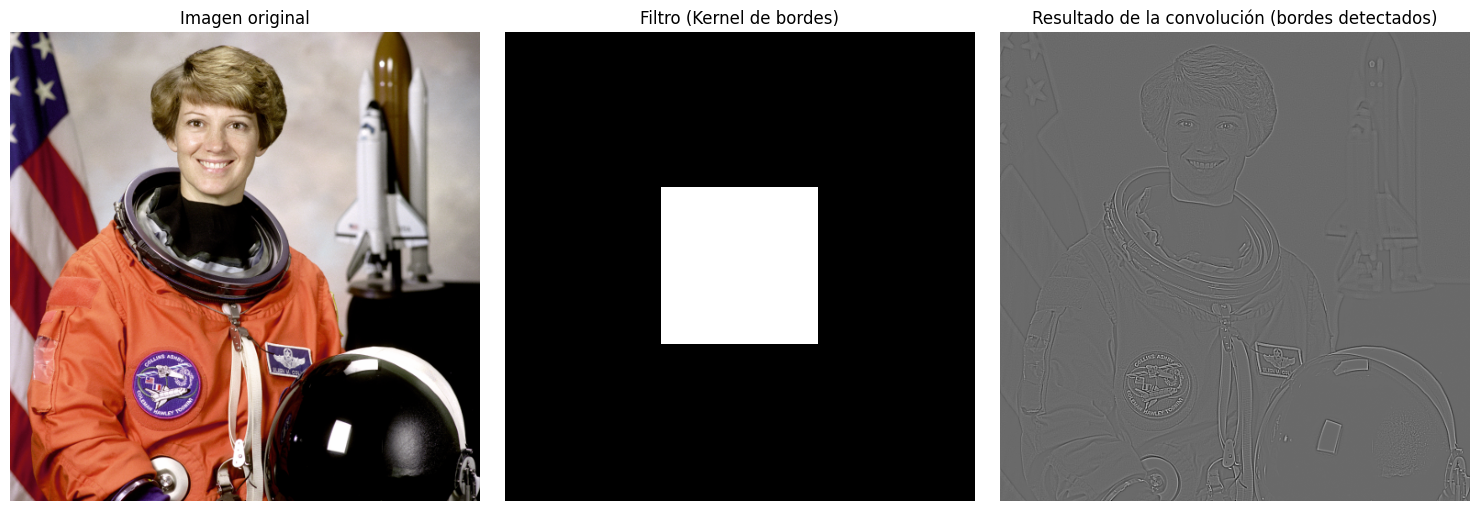

In [14]:
#  APLICAR LA CONVOLUCIÓN

resultado = convolve2d(imagen_gray, kernel_bordes, mode='same', boundary='symm')


#  MOSTRAR RESULTADOS

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(imagen_color)
axs[0].set_title("Imagen original")
axs[0].axis('off')

axs[1].imshow(kernel_bordes, cmap='gray', interpolation='nearest')
axs[1].set_title("Filtro (Kernel de bordes)")
axs[1].axis('off')

axs[2].imshow(resultado, cmap='gray')
axs[2].set_title("Resultado de la convolución (bordes detectados)")
axs[2].axis('off')

plt.tight_layout()
plt.show()



 imagen_gray.shape → tamaño de la imagen procesada
 kernel_bordes.shape → tamaño del filtro usado resultado[100:105, 100:105] → una muestra del feature map generado

Esta parte imprime información técnica esencial para ver:

 que la convolución se aplicó bien
 el tamaño correcto de entrada y salida
 valores reales producidos por el filtro

In [15]:
#  IMPRIMIR INFORMACIÓN

print("Tamaño imagen original:", imagen_gray.shape)
print("Tamaño del filtro:", kernel_bordes.shape)
print("Valores del resultado (ejemplo):")
print(resultado[100:105, 100:105])


Tamaño imagen original: (512, 512)
Tamaño del filtro: (3, 3)
Valores del resultado (ejemplo):
[[-0.02980314 -0.01067765  0.03777843 -0.00201922  0.02634275]
 [ 0.07453098  0.0044651  -0.02741255 -0.06240902 -0.01073725]
 [ 0.0008702   0.07383412 -0.02531765  0.03563569  0.00450196]
 [-0.05960078  0.00494745 -0.03576784  0.00019961  0.00555765]
 [ 0.00477765  0.00477765 -0.03573725 -0.01570196 -0.02183843]]


# ***Conclusiones***

El código permite entender y visualizar cómo un filtro aprende a reconocer patrones en una imagen, demostrando el principio esencial detrás de las redes neuronales convolucionales: la extracción automática de características mediante convoluciones.

**¿Qué hace este código?**

Etapas y descripción

- Carga una imagen - Usamos foto (Librería Skimage)
- Convierte a escala de bordes - Facilita el análisis de intencidades
- Aplica el filtro de bordes -  Usa una matriz 3x3 resalta cambios bruscos (bordes)
- Muestra el resultado visualmente - Se ve el antes y el después de la convulución.
- Imprime valores - Muestra una parte de la matriz resultante.


